# Toronto Notebook

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import modules for this project

In [2]:
#import primary modules
%pip install geopy
import numpy as np  # library to handle data in a vectorized manner
import requests
%pip install lxml
import lxml.html as lh
%pip install openpyxl
print("done")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
done


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# Toronto Neighborhoods Data

In [4]:
#source data reference: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

#Scrape Table Cells
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [5]:
#Check the length of the first 20 rows
[len(T) for T in tr_elements[:20]]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [6]:
#Parse first row as TABLE HEADER
tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d %s' % (i,name))
    col.append((name,[]))
print(name)

1 Postal Code

2 Borough

3 Neighborhood

Neighborhood



In [7]:
#CREATE A DATAFRAME
#First row is the header .'. data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=3:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [8]:
#CHECK length of each column
[len(C) for (title,C) in col]

[181, 181, 181]

In [9]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [10]:
df.head()
#df.shape

,Postal Code\n,Borough\n,Neighborhood\n
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


In [11]:
df.tail()

,Postal Code\n,Borough\n,Neighborhood\n
176,M6Z\n,Not assigned\n,Not assigned\n
177,M7Z\n,Not assigned\n,Not assigned\n
178,M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor,..."
179,M9Z\n,Not assigned\n,Not assigned\n
180,\n,Canadian postal codes\n,\n


In [12]:
#remove those pesky \n 

#column headers
df = df.rename(columns={'Postal Code\n': 'Postal Code', 'Borough\n': 'Borough' , 'Neighborhood\n': 'Neighborhood'})

#dataframe cell contents
df = df.replace('\n','', regex=True)
df.head()
#df_2.info()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [13]:
df.tail()

,Postal Code,Borough,Neighborhood
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
179,M9Z,Not assigned,Not assigned
180,,Canadian postal codes,


In [14]:
# delete all rows where Borough is Not assigned
indexNames = df[ (df['Borough'] == 'Not assigned') ].index
df.drop(indexNames , inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
df.tail()

,Postal Code,Borough,Neighborhood
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
180,,Canadian postal codes,


In [16]:
#clean up...last row isnt data
df= df[df.Borough != 'Canadian postal codes']
df.tail()

,Postal Code,Borough,Neighborhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [17]:
df.shape

(103, 3)

In [18]:
df = df.reset_index(drop=True)

In [19]:
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [20]:
#for my own reference
df.to_excel (r'C:\Users\afrop\Downloads\export_Canadian_postcodes2.xlsx', index = False, header=True)

QUESTION 2: getting the Lat and Long Coordinates

In [21]:
postal_data = pd.read_csv('http://cocl.us/Geospatial_data')
postal_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [22]:
df1 = df
df2 = postal_data
df3 = pd.merge(df1, df2, on='Postal Code')
df3.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [23]:
df3

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [24]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [125]:
neighborhoods = df3

# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [26]:
downtown_data = neighborhoods[neighborhoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [27]:
address = 'Downtown Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [126]:
# create map of downtown Toronto using latitude and longitude values
map_downtown = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

# Housing costs

In [29]:
#read in excel data file
xlsx_file = pd.ExcelFile("C:/Users/afrop/Downloads/TORONTO_RENTAL_COSTS.xlsx")
xlsx_file
xlsx_file.sheet_names
#ws_dict = pd.read_excel('excel_file.xlsx', sheetname=None)

['Table 1.1.1',
 'SHEET_A',
 'Table 1.1.3',
 'Table 1.1.5',
 'Table 1.1.6',
 'Table 1.2.1',
 'Table 1.2.2',
 'Table 1.2.3',
 'Table 1.3.1',
 'Table 1.3.2',
 'Table 1.3.3',
 'Table 1.3.4',
 'Table 1.4',
 'Table 2.1.1',
 'Table 2.1.2',
 'Table 2.1.3',
 'Table 2.1.5',
 'Table 2.1.6',
 'Table 3.1.1',
 'Table 3.1.2',
 'Table 3.1.3',
 'Table 3.1.5',
 'Table 3.1.6',
 'Table 4.1.1',
 'Table 4.1.2',
 'Table 4.1.3',
 'Table 4.2.1',
 'Table 4.3.1',
 'Table 4.3.2']

In [30]:
#convert to a dataframe
df4 = xlsx_file.parse('SHEET_A')
df4

,Unnamed: 0,1.1.2 Private Apartment Average Rents ($),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,by Zone and Bedroom Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Toronto CMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Bachelor,NaN,NaN,NaN,1 Bedroom,NaN,NaN,NaN,2 Bedroom,NaN,NaN,NaN,3 Bedroom +,NaN,NaN,NaN,Total,NaN,NaN,NaN
4,NaN,Zone,Oct-18,NaN,Oct-19,NaN,Oct-18,NaN,Oct-19,NaN,Oct-18,NaN,Oct-19,NaN,Oct-18,NaN,Oct-19,NaN,Oct-18,NaN,Oct-19,NaN
5,NaN,Zone 1 - Toronto (Central),1241,a,1317,b,1561,a,1721,a,2173,c,2407,b,**,NaN,2761,d,1648,b,1815,a
6,NaN,Zone 2 - Toronto (East),912,a,922,b,1346,a,1289,a,1564,b,1539,b,1969,d,1821,b,1362,a,1304,a
7,NaN,Zone 3 - Toronto (North),1168,a,1258,a,1436,a,1522,a,1862,a,1978,a,2767,c,2770,c,1561,a,1658,a
8,NaN,Zone 4 - Toronto (West),948,a,986,a,1238,a,1339,a,1483,a,1602,a,**,NaN,2051,d,1266,a,1368,a
9,1.0,Former City of Toronto(Zones 1-4),1128,a,1193,a,1420,a,1531,a,1829,a,1981,a,2473,c,2526,b,1499,a,1615,a


In [31]:
#new dataframe with only useful data, and only column 20  
df4A = df4[df4['Unnamed: 0'] > 0].reset_index(drop=True)
df4A

,Unnamed: 0,1.1.2 Private Apartment Average Rents ($),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1.0,Former City of Toronto(Zones 1-4),1128,a,1193,a,1420,a,1531,a,1829,a,1981,a,2473,c,2526,b,1499,a,1615,a
1,2.0,Etobicoke (Zones 5-7),1070,b,1052,a,1141,a,1322,a,1358,a,1513,a,1552,a,1717,a,1298,a,1454,a
2,3.0,Scarborough (Zones 10-12),977,a,1074,a,1113,a,1215,a,1253,a,1372,a,1400,a,1508,a,1210,a,1324,a
3,4.0,North York (Zones 13-17),962,a,1027,a,1183,a,1268,a,1441,a,1476,a,1614,a,1693,a,1360,a,1419,a
4,5.0,Rest of Toronto (Zones 5-17),976,a,1032,a,1163,a,1260,a,1384,a,1466,a,1575,a,1676,a,1303,a,1394,a
5,6.0,City of Toronto (Zones 1-17),1089,a,1148,a,1270,a,1374,a,1492,a,1591,a,1664,a,1766,a,1372,a,1472,a
6,7.0,Mississauga City (Zones 18-20),922,a,1007,a,1233,a,1297,a,1399,a,1466,a,1495,a,1606,a,1338,a,1407,a
7,8.0,Brampton City (Zones 21-22),842,a,917,b,1160,a,1274,a,1334,a,1447,a,1464,a,1537,a,1274,a,1388,a
8,9.0,York Region (Zones 25-27),897,b,928,b,1151,a,1270,a,1344,a,1437,a,1522,a,1596,a,1267,a,1368,a
9,10.0,Durham Region,843,a,895,a,1153,b,1150,a,1242,a,1263,a,1380,a,1430,a,1223,a,1242,a


In [32]:
df4A.columns

Index(['Unnamed: 0', '1.1.2 Private Apartment Average Rents ($)', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21'],
      dtype='object')

In [33]:
#tidy up
df4A.rename(columns={"Unnamed: 20":"Rent"}, inplace=True)
df4A.rename(columns={"1.1.2 Private Apartment Average Rents ($)": "Location"}, inplace=True)
df4A

,Unnamed: 0,Location,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Rent,Unnamed: 21
0,1.0,Former City of Toronto(Zones 1-4),1128,a,1193,a,1420,a,1531,a,1829,a,1981,a,2473,c,2526,b,1499,a,1615,a
1,2.0,Etobicoke (Zones 5-7),1070,b,1052,a,1141,a,1322,a,1358,a,1513,a,1552,a,1717,a,1298,a,1454,a
2,3.0,Scarborough (Zones 10-12),977,a,1074,a,1113,a,1215,a,1253,a,1372,a,1400,a,1508,a,1210,a,1324,a
3,4.0,North York (Zones 13-17),962,a,1027,a,1183,a,1268,a,1441,a,1476,a,1614,a,1693,a,1360,a,1419,a
4,5.0,Rest of Toronto (Zones 5-17),976,a,1032,a,1163,a,1260,a,1384,a,1466,a,1575,a,1676,a,1303,a,1394,a
5,6.0,City of Toronto (Zones 1-17),1089,a,1148,a,1270,a,1374,a,1492,a,1591,a,1664,a,1766,a,1372,a,1472,a
6,7.0,Mississauga City (Zones 18-20),922,a,1007,a,1233,a,1297,a,1399,a,1466,a,1495,a,1606,a,1338,a,1407,a
7,8.0,Brampton City (Zones 21-22),842,a,917,b,1160,a,1274,a,1334,a,1447,a,1464,a,1537,a,1274,a,1388,a
8,9.0,York Region (Zones 25-27),897,b,928,b,1151,a,1270,a,1344,a,1437,a,1522,a,1596,a,1267,a,1368,a
9,10.0,Durham Region,843,a,895,a,1153,b,1150,a,1242,a,1263,a,1380,a,1430,a,1223,a,1242,a


In [34]:
#more tidy up
df4B = df4A[['Location','Rent']]
df4B

,Location,Rent
0,Former City of Toronto(Zones 1-4),1615
1,Etobicoke (Zones 5-7),1454
2,Scarborough (Zones 10-12),1324
3,North York (Zones 13-17),1419
4,Rest of Toronto (Zones 5-17),1394
5,City of Toronto (Zones 1-17),1472
6,Mississauga City (Zones 18-20),1407
7,Brampton City (Zones 21-22),1388
8,York Region (Zones 25-27),1368
9,Durham Region,1242


In [35]:
#more clean up
df4B[['Location','bumf']] = df4B['Location'].str.split('Zones',expand=True)
df4B

C:\Users\afrop\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Location,Rent,bumf
0,Former City of Toronto(,1615,1-4)
1,Etobicoke (,1454,5-7)
2,Scarborough (,1324,10-12)
3,North York (,1419,13-17)
4,Rest of Toronto (,1394,5-17)
5,City of Toronto (,1472,1-17)
6,Mississauga City (,1407,18-20)
7,Brampton City (,1388,21-22)
8,York Region (,1368,25-27)
9,Durham Region,1242,None


In [36]:
df4B['Location'] = df4B['Location'].replace({'\(':''}, regex = True)

C:\Users\afrop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
#more clean up
df4B=df4B[['Location', 'Rent']].copy()
df4B

,Location,Rent
0,Former City of Toronto,1615
1,Etobicoke,1454
2,Scarborough,1324
3,North York,1419
4,Rest of Toronto,1394
5,City of Toronto,1472
6,Mississauga City,1407
7,Brampton City,1388
8,York Region,1368
9,Durham Region,1242


In [38]:
#final clean file
df4C = df4B.iloc[[0,1,2,3,5,8]  , [0,1]]
df4C.set_index('Location',inplace=True)
df4C.head()

,Rent
Location,
Former City of Toronto,1615
Etobicoke,1454
Scarborough,1324
North York,1419
City of Toronto,1472


In [39]:
### type your answer here
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [40]:
df4C.columns

Index(['Rent'], dtype='object')

In [41]:
df4C.dtypes

Rent    object
dtype: object

In [42]:
#ffs so much easier to work in Excel
df4C.Rent.astype(int)

Location
Former City of Toronto    1615
Etobicoke                 1454
Scarborough               1324
North York                1419
City of Toronto           1472
York Region               1368
Name: Rent, dtype: int32

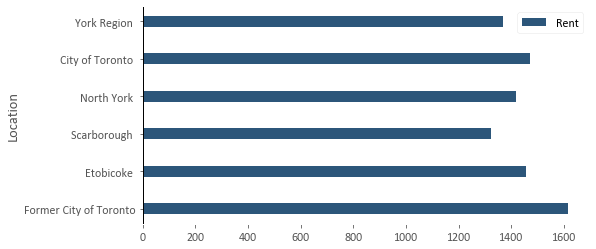

<Figure size 432x288 with 0 Axes>

In [122]:
import numpy as np
import matplotlib.pyplot as plt


colors_list = ['#2C567A', '#002868']

#artist formula for bar chart using df2 dataframe
ax = df4C.plot(kind='barh', alpha=1, figsize=(8, 4), width=0.3,color = colors_list )
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.legend(fontsize=10)

ax.patch.set_facecolor('white')
plt.legend(facecolor='white', framealpha=0.5)
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

ax.spines['left'].set_color('black')

plt.show()
###########################################
plt.savefig('population chart.png')

# Population data

In [113]:
#City/Greater Urban Area
#NYC  8.3m /18.8m
#Toronto  2.6m/6.2m
import pandas as pd
data_popn = {'City':  ['New York City', 'Toronto'],
        'City Population': [6200000, 2600000],
        'Greater Urban Area': [18800000, 8300000]}

dfpopn = pd.DataFrame (data_popn, columns = ['City','City Population','Greater Urban Area'])
dfpopn

,City,City Population,Greater Urban Area
0,New York City,6200000,18800000
1,Toronto,2600000,8300000


In [114]:
dfpopn.set_index('City')
dfpopn.columns

Index(['City', 'City Population', 'Greater Urban Area'], dtype='object')

In [115]:
dfpopn.dtypes

City                  object
City Population        int64
Greater Urban Area     int64
dtype: object

In [116]:
dfpopn.set_index("City", inplace = True)

In [117]:
dfpopn

,City Population,Greater Urban Area
City,,
New York City,6200000,18800000
Toronto,2600000,8300000


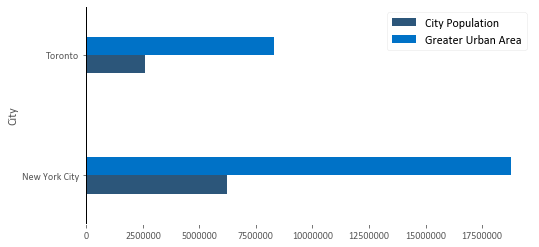

In [120]:
import numpy as np
import matplotlib.pyplot as plt


colors_list = ['#2C567A', '#0072c7']

#artist formula for bar chart using df2 dataframe
ax = dfpopn.plot(kind='barh', alpha=1, figsize=(8, 4), width=0.3,color = colors_list )
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)


ax.patch.set_facecolor('white')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.legend(facecolor='white', framealpha=0.5)

ax.spines['left'].set_color('black')

plt.show()
###########################################

# Amenities data from Foursquare

In [47]:
CLIENT_ID = 'PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY' # your Foursquare ID
CLIENT_SECRET = '1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB' # your Foursquare Secret
VERSION = '20200603' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY
CLIENT_SECRET:1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB


In [48]:
downtown_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [49]:
latitude = downtown_data.loc[0, 'Latitude']
longitude = downtown_data.loc[0, 'Longitude']
print(latitude,longitude)

43.6542599 -79.3606359


In [50]:
#TOP100 venues
neighborhood_latitude = latitude
neighborhood_longitude = longitude

search_query = 'search'
radius = 500
LIMIT = 100

#url = 'https://api.foursquare.com/v2/venues/explore?CLIENT_ID={}&CLIENT_SECRET={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url

#OR this one
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY&client_secret=1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB&v=20200603&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [51]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee30a5dc1ce500e4e22ee55'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [52]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\afrop\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [54]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [57]:
print(downtown_venues.shape)
downtown_venues.head()

(1224, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [58]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,64,64,64,64,64,64
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [59]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 213 uniques categories.


In [60]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [61]:
downtown_onehot.shape

(1224, 213)

In [62]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.017857,0.0000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.0000,0.0000,0.000000,0.035714,0.000000,0.000000,0.000000,0.017857,0.053571,0.071429,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.017857,0.000000,0.017857,0.00,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [63]:
downtown_grouped.shape

(19, 213)

In [64]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2      Beer Bar  0.04
3          Café  0.04
4   Cheese Shop  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3          Boutique  0.06
4   Harbor / Marina  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1                Café  0.06
2  Italian Restaurant  0.06
3      Sandwich Place  0.05
4         Salad Place  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3      Nightclub  0.06
4     Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1     Sushi Restaurant  0.06
2  Japanese Restaurant  0.05
3              Gay Bar  0.04
4           Restaurant  0.04


----Commerce C

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Beer Bar,Cheese Shop,Restaurant,Café,Hotel,Pub
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar
2,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Department Store,Japanese Restaurant,Chinese Restaurant
3,Christie,Grocery Store,Café,Park,Nightclub,Restaurant,Candy Store,Italian Restaurant,Diner,Coffee Shop,Baby Store
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Burger Joint,Mediterranean Restaurant,Bubble Tea Shop,Men's Store


In [67]:
#K MEANS CLUSTERING

# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 4, 3, 2, 2, 2, 2, 4, 2])

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Gym,Discount Store,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop,Wings Joint
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Italian Restaurant,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Bakery,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Gym,Restaurant,Creperie,Lingerie Store,Moroccan Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Beer Bar,Cheese Shop,Restaurant,Café,Hotel,Pub


In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
#CLUSTER 1
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,0,Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar


In [71]:
#CLUSTER 2
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,1,Park,Playground,Trail,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In [72]:
#CLUSTER 3
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,2,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Italian Restaurant,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Bakery,Hotel
3,Downtown Toronto,2,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Gym,Restaurant,Creperie,Lingerie Store,Moroccan Restaurant
4,Downtown Toronto,2,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Beer Bar,Cheese Shop,Restaurant,Café,Hotel,Pub
7,Downtown Toronto,2,Coffee Shop,Restaurant,Café,Gym,Thai Restaurant,Hotel,Clothing Store,Deli / Bodega,Bookstore,Cosmetics Shop
9,Downtown Toronto,2,Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Salad Place,Seafood Restaurant,Japanese Restaurant,Deli / Bodega,Italian Restaurant
10,Downtown Toronto,2,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Italian Restaurant,Seafood Restaurant,Deli / Bodega,Japanese Restaurant
11,Downtown Toronto,2,Café,Restaurant,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Bakery,Yoga Studio,Beer Bar,Beer Store
12,Downtown Toronto,2,Café,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Grocery Store,Pizza Place,Dessert Shop,Park,Bakery
15,Downtown Toronto,2,Coffee Shop,Café,Restaurant,Seafood Restaurant,Italian Restaurant,Cocktail Bar,Beer Bar,Japanese Restaurant,Park,Creperie
16,Downtown Toronto,2,Coffee Shop,Bakery,Italian Restaurant,Park,Pizza Place,Café,Pub,Restaurant,Japanese Restaurant,Diner


In [73]:
#CLUSTER 4
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,3,Grocery Store,Café,Park,Nightclub,Restaurant,Candy Store,Italian Restaurant,Diner,Coffee Shop,Baby Store


In [74]:
#CLUSTER 5
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,4,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
1,Downtown Toronto,4,Coffee Shop,Sushi Restaurant,Gym,Discount Store,Park,Music Venue,Mexican Restaurant,Italian Restaurant,Hobby Shop,Wings Joint
5,Downtown Toronto,4,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Department Store,Japanese Restaurant,Chinese Restaurant
8,Downtown Toronto,4,Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Brewery,Sporting Goods Shop,Italian Restaurant,Restaurant,Fried Chicken Joint
